In [31]:
#conditional probabilistic classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv('Social_Network_Ads.csv')

In [33]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


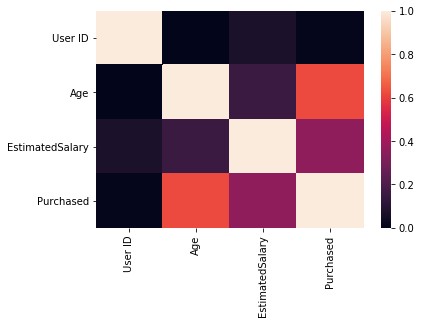

In [35]:
sns.heatmap(df.corr())

In [36]:
df.drop(['User ID','Gender'],axis=1,inplace=True)

In [37]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [38]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


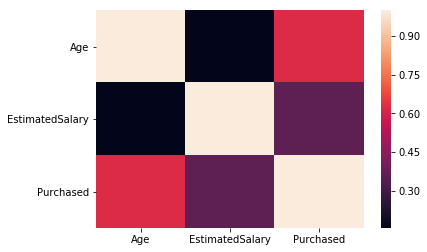

In [39]:
sns.heatmap(df.corr())

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
ss=StandardScaler()

In [42]:
scaled_array=ss.fit_transform(df.drop('Purchased',axis=1))

In [43]:
x=pd.DataFrame(data=scaled_array,columns=df.columns[:-1])

In [44]:
x.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [45]:
y=df['Purchased']

In [46]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [49]:
#using naive bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
classifier=GaussianNB()

In [52]:
classifier.fit(x_train,y_train)

GaussianNB(priors=None)

In [53]:
y_pred=classifier.predict(x_test)

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
cm=confusion_matrix(y_test,y_pred)

In [56]:
cm

array([[72,  2],
       [14, 32]], dtype=int64)